In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [57]:
#reading the data and nameing the cols 
df = pd.read_csv('GBPUSD60.csv')
df.columns = ['day','time','open','high','low','close','vol']

In [58]:
# adding the spread of the candle (high - low) 
df['spread'] = df.high - df.low
#adding the body open - close 
df['body'] =  df['close'] - df['open']

<a list of 50 Patch objects>

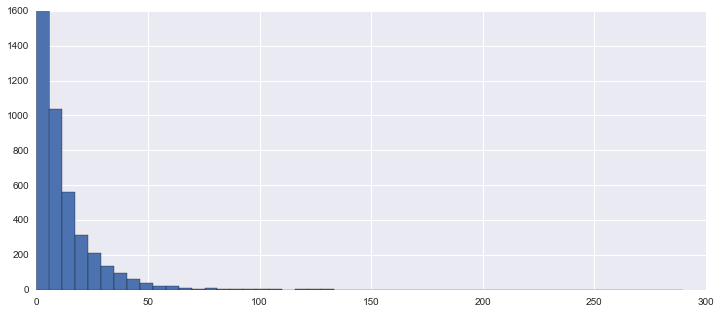

In [59]:
tp =  np.abs(df['close'] - df['open'])*10000
tp = tp[tp<300]
plt.figure(figsize=(12,5))
plt.hist(tp,bins=50)[2]

In [60]:
mu = df.body.mean()
def cand_logic(body):
    if body < mu:
        return 1
    elif body > 0:
        return 2
    else:
        return 0

In [61]:
df['state'] = df.body.apply(cand_logic)

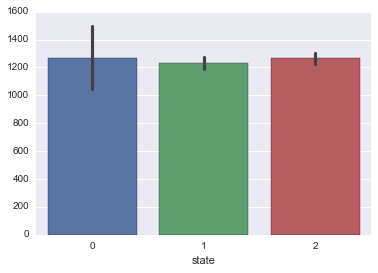

In [62]:
sns.barplot(df.state,np.arange(2500))

In [63]:
def shift_down(s):
    """returns the col shifted one cell down"""
    #make the first value to be the mean of the input
    m = s.mode()
    y = pd.Series([m])
    #append the input col.. to the one val y 
    y = y.append(s)
    #delete the last val
    y[len(y)-1] = np.nan
    y.dropna(inplace=True)
    y = y.reset_index()
    return y.drop(['index'],axis=1)


In [64]:
df['y'] = shift_down(df.state)

In [65]:
df.head(2)

,day,time,open,high,low,close,vol,spread,body,state,y
0,2016.05.06,13:00,1.45115,1.45141,1.44900,1.45046,6164,0.00241,-0.00069,1,0 2 dtype: int64
1,2016.05.06,14:00,1.45050,1.45071,1.44802,1.44810,7076,0.00269,-0.00240,1,1


In [66]:
df.y[0] = 0

/home/data-sci/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [67]:
df.head(5)

,day,time,open,high,low,close,vol,spread,body,state,y
0,2016.05.06,13:00,1.45115,1.45141,1.44900,1.45046,6164,0.00241,-0.00069,1,0
1,2016.05.06,14:00,1.45050,1.45071,1.44802,1.44810,7076,0.00269,-0.00240,1,1
2,2016.05.06,15:00,1.44810,1.45455,1.44228,1.44551,17195,0.01227,-0.00259,1,1
3,2016.05.06,16:00,1.44555,1.44743,1.44421,1.44707,17284,0.00322,0.00152,2,1
4,2016.05.06,17:00,1.44707,1.44772,1.44289,1.44314,13909,0.00483,-0.00393,1,2


In [68]:
def time_to_num(r):
    n = r.split(':')[0]
    return n

df.time = df.time.apply(time_to_num)
df.time = df.time.astype('int')

In [69]:
london =  [ 8, 9,10,11,12,13,14,15]
new =  [13,14,15,16,17,18,19,20,21,22]
au =   [22,23, 1, 2, 3, 4,5,6,7]
hk =  [1,2,3,4,5,6,7,8,9]

def make_session(r,s):
    if (r in s):
        return 1
    else:
        return 0
df['gbp'] = df.time.apply(make_session,args=(london,))
df['usd'] = df.time.apply(make_session,args=(new,))
df['aud'] = df.time.apply(make_session,args=(au,))
df['yn'] = df.time.apply(make_session,args=(hk,))

In [70]:
df.head(5)

,day,time,open,high,low,close,vol,spread,body,state,y,gbp,usd,aud,yn
0,2016.05.06,13,1.45115,1.45141,1.44900,1.45046,6164,0.00241,-0.00069,1,0,1,1,0,0
1,2016.05.06,14,1.45050,1.45071,1.44802,1.44810,7076,0.00269,-0.00240,1,1,1,1,0,0
2,2016.05.06,15,1.44810,1.45455,1.44228,1.44551,17195,0.01227,-0.00259,1,1,1,1,0,0
3,2016.05.06,16,1.44555,1.44743,1.44421,1.44707,17284,0.00322,0.00152,2,1,0,1,0,0
4,2016.05.06,17,1.44707,1.44772,1.44289,1.44314,13909,0.00483,-0.00393,1,2,0,1,0,0


In [71]:
X = df[['time','state', 'gbp','usd','aud','yn']]
y = df['y'].astype('int')

## ML

In [72]:
from sklearn.model_selection import train_test_split,cross_val_score , GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20)
tree_clf = DecisionTreeClassifier(min_samples_split=3)
tree_clf.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=3, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [74]:
y_pred = tree_clf.predict(X_test)
tree_clf.score(X_train,y_train)

0.55896510228640195

In [75]:
 from sklearn import tree
tree.export_graphviz(tree_clf) 

/home/data-sci/anaconda3/lib/python3.5/site-packages/sklearn/tree/export.py:386: DeprecationWarning: out_file can be set to None starting from 0.18. This will be the default in 0.20.
  DeprecationWarning)


In [76]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(tree_clf , X , y,cv=10)

In [77]:
cv_scores.mean()

0.52478113662915826

In [78]:
tree_clf = DecisionTreeClassifier()
cv_scores = cross_val_score(tree_clf , X , y,cv=10)
cv_scores.mean()

0.52478113662915826

In [79]:
from sklearn.svm import SVC
svc_clf = SVC()
cv_scores = cross_val_score(svc_clf , X , y,cv=10)
cv_scores.mean()

0.52861114118738439

In [80]:
from yahoo_finance import Share

In [81]:
google = Share('GOOGL')
print( google.get_open())
print( google.get_price())
print( google.get_trade_datetime())

829.09
828.17
2017-01-20 21:00:00 UTC+0000


In [82]:
google = google.get_historical('2012-04-25', '2014-04-29')

In [83]:
d = pd.DataFrame(google)
d.head()

,Adj_Close,Close,Date,High,Low,Open,Symbol,Volume
0,536.330017,536.330017,2014-04-29,537.76001,523.00,523.890015,GOOGL,2535200
1,522.97998,522.97998,2014-04-28,525.900024,511.00,525.799988,GOOGL,3752800
2,523.099976,523.099976,2014-04-25,533.859985,522.50,532.26001,GOOGL,2370000
3,534.440002,534.440002,2014-04-24,542.50,531.00,541.690002,GOOGL,2067400
4,537.51001,537.51001,2014-04-23,544.799988,528.130005,543.669983,GOOGL,1955700


In [84]:
nd = d[['Open','Close','Volume']]

In [85]:
nd.columns = ['open' , 'close' , 'vol']

In [86]:
nd['open']  = nd['open'].astype('float')
nd['close'] = nd['close'].astype('float')
nd['vol']   = nd['vol'].astype('float')

/home/data-sci/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/home/data-sci/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/home/data-sci/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See t

In [87]:
#adding the body open - close 
nd['body'] =  nd['close'] - nd['open']

/home/data-sci/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [88]:
mu = nd.body.mean()
def cand_logic(body):
    if body < mu:
        return 1
    elif body > 0:
        return 2
    else:
        return 0
nd['state'] = nd.body.apply(cand_logic)

/home/data-sci/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [89]:
nd.head()

,open,close,vol,body,state
0,523.890015,536.330017,2535200.0,12.440002,2
1,525.799988,522.979980,3752800.0,-2.820008,1
2,532.260010,523.099976,2370000.0,-9.160034,1
3,541.690002,534.440002,2067400.0,-7.250000,1
4,543.669983,537.510010,1955700.0,-6.159973,1


In [90]:
def shift_down(s):
    """returns the col shifted one cell down"""
    #make the first value to be the mean of the input
    m = s.mode()
    y = pd.Series([m])
    #append the input col.. to the one val y 
    y = y.append(s)
    #delete the last val
    y[len(y)-1] = np.nan
    y.dropna(inplace=True)
    y = y.reset_index()
    return y.drop(['index'],axis=1)
nd['y'] = shift_down(nd.state)

/home/data-sci/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [91]:
nd.y[0] = 0

/home/data-sci/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/home/data-sci/anaconda3/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2885: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


In [92]:
nd.y = nd.y.astype('int')

/home/data-sci/anaconda3/lib/python3.5/site-packages/pandas/core/generic.py:2701: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [93]:
X = nd[['state','vol']]
y = nd.y

In [94]:
from sklearn.model_selection import train_test_split,cross_val_score , GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20)
tree_clf = DecisionTreeClassifier(min_samples_split=3)
tree_clf.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=3, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [97]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(tree_clf , X , y,cv=5)

In [98]:
cv_scores.mean()

0.52887051058046985

In [99]:
from sklearn.svm import SVC
svc_clf = SVC()
cv_scores = cross_val_score(svc_clf , X , y,cv=5)
cv_scores.mean()

0.51483284799068141